# I. GIỚI THIỆU BÀI TOÁN

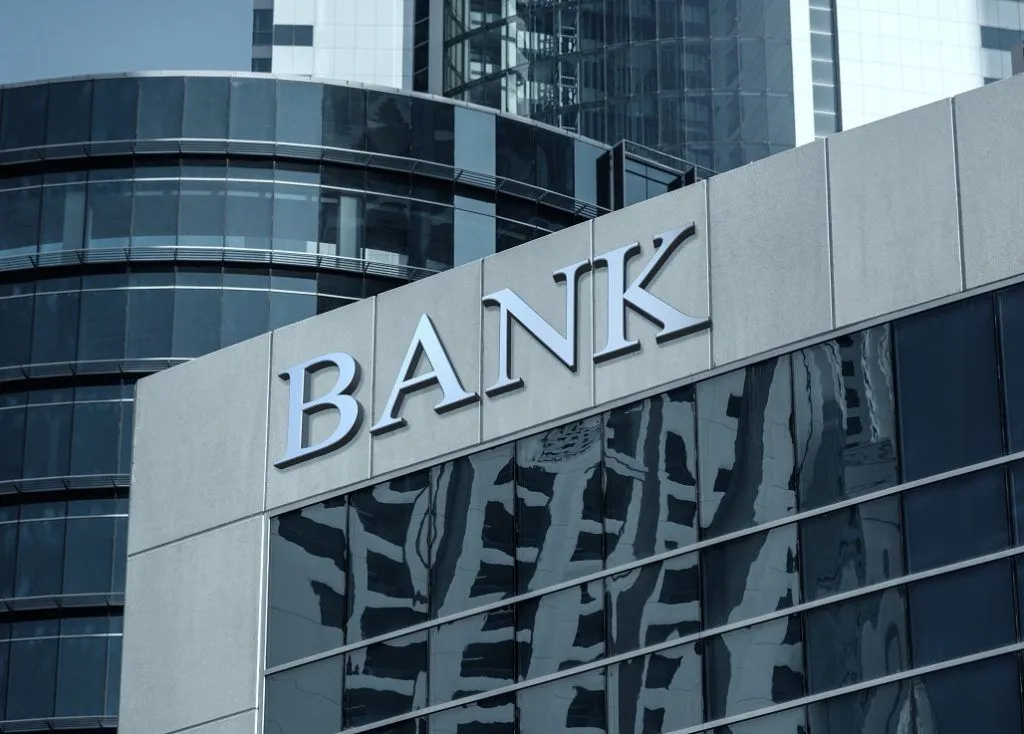

Rủi ro tín dụng là khả năng khách hàng không trả được nợ theo thỏa thuận ban đầu. Vì tỉ trọng tín dụng là đáng kể trong danh mục tài sản của hầu hết các ngân hàng nên việc khách hàng không trả được nợ sẽ ảnh hưởng trực tiếp đến kết quả kinh doanh và tiềm năng phát triển trong tương lai của ngân hàng. Để kiểm soát rủi ro tín dụng nhằm hạn chế tổn thất, các ngân hàng cần không ngừng cải thiện năng lực quản trị rủi ro để có thể đo lường chính xác nhất khả năng khách hàng không trả được nợ. Đặc biệt, sau các sự kiện khủng hoảng tài chính toàn cầu và với sự gia tăng các quy định đối với hoạt động ngân hàng, quy trình đánh giá rủi ro tín dụng đã nhận được sự quan tâm ngày càng lớn về cả học thuật và thực tiễn. Các công nghệ mới nói chung và ML nói riêng đã dần được nghiên cứu để áp dụng trong quản trị rủi ro tín dụng của ngân hàng và các tổ chức cung cấp dịch vụ tín dụng.

# II. NHẬP CÁC THƯ VIỆN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# III. NHẬP BỘ DỮ LIỆU (ĐÃ QUA XỬ LÝ)

In [ ]:
PATH = "/content/drive/MyDrive/clean_data.csv"
df = pd.read_csv(PATH)
df.head(5)

,customer_id,label,SHORT_TERM_COUNT,MID_TERM_COUNT,LONG_TERM_COUNT,SHORT_TERM_COUNT_BANK,MID_TERM_COUNT_BANK,LONG_TERM_COUNT_BANK,SHORT_TERM_COUNT_NON_BANK,MID_TERM_COUNT_NON_BANK,...,ENQUIRIES_FOR_LOAN_9M_12M,ENQUIRIES_FOR_CC_3M_6M,ENQUIRIES_FOR_CC_3M_9M,ENQUIRIES_FOR_CC_3M_12M,ENQUIRIES_FOR_CC_6M_9M,ENQUIRIES_FOR_CC_6M_12M,ENQUIRIES_FOR_CC_9M_12M,OUTSTANDING_BAL_ALL_3M_9M,OUTSTANDING_BAL_LOAN_3M_9M,OUTSTANDING_BAL_CC_3M_9M
0,1639,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,-5.0,-5.0,-5.0,-5.0,0.0,0.000,0.000,0.000
1,15505,0,7.0,1.0,1.0,1.0,1.0,1.0,7.0,1.0,...,0.0,-20.0,-25.0,-25.0,-5.0,-5.0,0.0,2.223,-10.000,50.000
2,20339,0,4.0,10.0,1.0,1.0,4.0,1.0,4.0,7.0,...,0.0,-25.0,-40.0,-40.0,-15.0,-15.0,0.0,1000877.778,-237.778,-185.000
3,9850,0,4.0,4.0,1.0,1.0,1.0,1.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106.667,240.000,6.667
4,14182,0,4.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000170.000,37.778,0.000


In [ ]:
df.tail()

,customer_id,label,SHORT_TERM_COUNT,MID_TERM_COUNT,LONG_TERM_COUNT,SHORT_TERM_COUNT_BANK,MID_TERM_COUNT_BANK,LONG_TERM_COUNT_BANK,SHORT_TERM_COUNT_NON_BANK,MID_TERM_COUNT_NON_BANK,...,ENQUIRIES_FOR_LOAN_9M_12M,ENQUIRIES_FOR_CC_3M_6M,ENQUIRIES_FOR_CC_3M_9M,ENQUIRIES_FOR_CC_3M_12M,ENQUIRIES_FOR_CC_6M_9M,ENQUIRIES_FOR_CC_6M_12M,ENQUIRIES_FOR_CC_9M_12M,OUTSTANDING_BAL_ALL_3M_9M,OUTSTANDING_BAL_LOAN_3M_9M,OUTSTANDING_BAL_CC_3M_9M
17167,13215,0,4.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.555,15.555,0.000
17168,938,0,4.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.777,4.444,0.000
17169,11823,0,7.0,1.0,1.0,4.0,1.0,1.0,4.0,1.0,...,-5.0,-15.0,-15.0,-15.0,0.0,0.0,0.0,-165.556,-227.778,98.333
17170,14609,0,10.0,4.0,1.0,10.0,1.0,1.0,1.0,4.0,...,-10.0,-17.0,-17.0,-22.0,0.0,-5.0,-5.0,1000008.889,-204.445,-126.666
17171,18772,1,1.0,4.0,1.0,1.0,1.0,1.0,1.0,4.0,...,0.0,0.0,-5.0,-5.0,-5.0,-5.0,0.0,-10.000,11.111,-21.111


In [ ]:
df.isnull().sum()

,0
customer_id,0
label,0
SHORT_TERM_COUNT,0
MID_TERM_COUNT,0
LONG_TERM_COUNT,0
...,...
ENQUIRIES_FOR_CC_6M_12M,0
ENQUIRIES_FOR_CC_9M_12M,0
OUTSTANDING_BAL_ALL_3M_9M,0
OUTSTANDING_BAL_LOAN_3M_9M,0


##1. Drop customer ID

In [ ]:
df = df.drop(columns=['customer_id'])

In [ ]:
df.columns

Index(['label', 'SHORT_TERM_COUNT', 'MID_TERM_COUNT', 'LONG_TERM_COUNT',
       'SHORT_TERM_COUNT_BANK', 'MID_TERM_COUNT_BANK', 'LONG_TERM_COUNT_BANK',
       'SHORT_TERM_COUNT_NON_BANK', 'MID_TERM_COUNT_NON_BANK',
       'LONG_TERM_COUNT_NON_BANK',
       ...
       'ENQUIRIES_FOR_LOAN_9M_12M', 'ENQUIRIES_FOR_CC_3M_6M',
       'ENQUIRIES_FOR_CC_3M_9M', 'ENQUIRIES_FOR_CC_3M_12M',
       'ENQUIRIES_FOR_CC_6M_9M', 'ENQUIRIES_FOR_CC_6M_12M',
       'ENQUIRIES_FOR_CC_9M_12M', 'OUTSTANDING_BAL_ALL_3M_9M',
       'OUTSTANDING_BAL_LOAN_3M_9M', 'OUTSTANDING_BAL_CC_3M_9M'],
      dtype='object', length=110)

In [ ]:
df.shape

(17172, 110)

In [ ]:
df.describe()

,label,SHORT_TERM_COUNT,MID_TERM_COUNT,LONG_TERM_COUNT,SHORT_TERM_COUNT_BANK,MID_TERM_COUNT_BANK,LONG_TERM_COUNT_BANK,SHORT_TERM_COUNT_NON_BANK,MID_TERM_COUNT_NON_BANK,LONG_TERM_COUNT_NON_BANK,...,ENQUIRIES_FOR_LOAN_9M_12M,ENQUIRIES_FOR_CC_3M_6M,ENQUIRIES_FOR_CC_3M_9M,ENQUIRIES_FOR_CC_3M_12M,ENQUIRIES_FOR_CC_6M_9M,ENQUIRIES_FOR_CC_6M_12M,ENQUIRIES_FOR_CC_9M_12M,OUTSTANDING_BAL_ALL_3M_9M,OUTSTANDING_BAL_LOAN_3M_9M,OUTSTANDING_BAL_CC_3M_9M
count,17172.000000,17172.000000,17172.000000,17172.000000,17172.000000,17172.000000,17172.000000,17172.000000,17172.000000,17172.000000,...,17172.000000,17172.000000,17172.000000,17172.000000,17172.000000,17172.000000,17172.000000,1.717200e+04,17172.000000,17172.000000
mean,0.183380,6.013976,3.329315,1.061146,3.164396,1.601328,1.058351,3.849581,2.727987,1.002795,...,-2.492022,-2.764733,-4.301304,-5.625611,-1.536571,-2.860878,-1.324307,9.822145e+04,18.672110,20.416442
std,0.386989,3.607034,3.176983,0.438508,2.210527,1.541246,0.426779,2.549566,2.517083,0.097091,...,6.848919,6.122921,8.740432,11.298080,4.772856,7.670917,4.796669,2.976427e+05,2059.337935,119.162065
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-190.000000,-100.000000,-145.000000,-180.000000,-75.000000,-165.000000,-165.000000,-1.660567e+05,-166156.667000,-3158.560291
25%,0.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,-5.000000,-5.000000,-5.000000,0.000000,0.000000,0.000000,-1.111000e+00,-8.889000,0.000000
50%,0.000000,7.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000e+01,13.333000,0.000000
75%,0.000000,7.000000,4.000000,1.000000,4.000000,1.000000,1.000000,4.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.244440e+02,61.111000,22.223000
max,1.000000,25.000000,25.000000,7.000000,13.000000,22.000000,7.000000,16.000000,19.000000,7.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.150136e+06,149978.889000,2330.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17172 entries, 0 to 17171
Columns: 110 entries, label to OUTSTANDING_BAL_CC_3M_9M
dtypes: float64(109), int64(1)
memory usage: 14.4 MB


## 2. Nomalize data

In [ ]:
scaler = MinMaxScaler()
columns_to_normalize = df.drop(columns=['label']).columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

In [ ]:
df.head()

,label,SHORT_TERM_COUNT,MID_TERM_COUNT,LONG_TERM_COUNT,SHORT_TERM_COUNT_BANK,MID_TERM_COUNT_BANK,LONG_TERM_COUNT_BANK,SHORT_TERM_COUNT_NON_BANK,MID_TERM_COUNT_NON_BANK,LONG_TERM_COUNT_NON_BANK,...,ENQUIRIES_FOR_LOAN_9M_12M,ENQUIRIES_FOR_CC_3M_6M,ENQUIRIES_FOR_CC_3M_9M,ENQUIRIES_FOR_CC_3M_12M,ENQUIRIES_FOR_CC_6M_9M,ENQUIRIES_FOR_CC_6M_12M,ENQUIRIES_FOR_CC_9M_12M,OUTSTANDING_BAL_ALL_3M_9M,OUTSTANDING_BAL_LOAN_3M_9M,OUTSTANDING_BAL_CC_3M_9M
0,1,0.000,0.000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.989583,1.00,0.965517,0.972222,0.933333,0.969697,1.0,0.126164,0.525587,0.575481
1,0,0.250,0.000,0.0,0.0,0.000000,0.0,0.4,0.000000,0.0,...,0.989583,0.80,0.827586,0.861111,0.933333,0.969697,1.0,0.126166,0.525555,0.584591
2,0,0.125,0.375,0.0,0.0,0.142857,0.0,0.2,0.333333,0.0,...,0.989583,0.75,0.724138,0.777778,0.800000,0.909091,1.0,0.886599,0.524835,0.541774
3,0,0.125,0.125,0.0,0.0,0.000000,0.0,0.2,0.166667,0.0,...,0.989583,1.00,1.000000,1.000000,1.000000,1.000000,1.0,0.126245,0.526346,0.576695
4,0,0.125,0.000,0.0,0.0,0.000000,0.0,0.2,0.000000,0.0,...,0.989583,1.00,1.000000,1.000000,1.000000,1.000000,1.0,0.886061,0.525706,0.575481


# IV. XÂY DỰNG MÔ HÌNH

- RandomForestClassifier
- AdaBoostClassifier
- GradientBoostingClassifier
- ExtraTreeClassifier
- SupportVectorClassifier

In [ ]:
X = df.drop('label', axis=1)  # Features
y = df['label']  # Target label

In [ ]:
X.shape

(17172, 109)

In [ ]:
y.shape

(17172,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Some useful parameters which will come in handy later on
ntrain = X_train.shape[0]
ntest = X_test.shape[0]
SEED = 0  # for reproducibility
NFOLDS = 5  # set folds for out-of-fold prediction
kf = KFold(n_splits=NFOLDS, random_state=SEED, shuffle=True)

# Class to extend the Sklearn classifier
class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        if params is None:
            params = {}
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)

    def fit(self, x, y):
        return self.clf.fit(x, y)

    def feature_importances(self, x, y):
        print(self.clf.fit(x, y).feature_importances_)


In [ ]:
def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf.split(x_train)):
        x_tr = x_train.iloc[train_index] # selects rows based on train_index
        y_tr = y_train.iloc[train_index] # selects rows based on train_index
        x_te = x_train.iloc[test_index] # selects rows based on test_index

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [ ]:
# Put in our parameters for said classifiers
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 500,
     'warm_start': True,
     #'max_features': 0.2,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0
}

# Extra Trees Parameters
et_params = {
    'n_jobs': -1,
    'n_estimators':500,
    #'max_features': 0.5,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'verbose': 0
}

# AdaBoost parameters
ada_params = {
    'n_estimators': 500,
    'learning_rate' : 0.75
}

# Gradient Boosting parameters
gb_params = {
    'n_estimators': 500,
     #'max_features': 0.2,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 0
}

# Support Vector Classifier parameters
svc_params = {
    'kernel' : 'linear',
    'C' : 0.025
    }

In [ ]:
# Create 5 objects that represent our 4 models
rf = SklearnHelper(clf=RandomForestClassifier, seed=SEED, params=rf_params)
et = SklearnHelper(clf=ExtraTreesClassifier, seed=SEED, params=et_params)
ada = SklearnHelper(clf=AdaBoostClassifier, seed=SEED, params=ada_params)
gb = SklearnHelper(clf=GradientBoostingClassifier, seed=SEED, params=gb_params)
svc = SklearnHelper(clf=SVC, seed=SEED, params=svc_params)

In [ ]:
#Create our OOF train and test predictions. These base results will be used as new features
et_oof_train, et_oof_test = get_oof(et, X_train, y_train, X_test) # Extra Trees
rf_oof_train, rf_oof_test = get_oof(rf,X_train, y_train, X_test) # Random Forest
ada_oof_train, ada_oof_test = get_oof(ada, X_train, y_train, X_test) # AdaBoost
gb_oof_train, gb_oof_test = get_oof(gb,X_train, y_train, X_test) # Gradient Boost
svc_oof_train, svc_oof_test = get_oof(svc,X_train, y_train, X_test) # Support Vector Classifier

print("Training is complete")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:468: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:468: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:468: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:468: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527

Training is complete


In [ ]:
rf_feature = rf.feature_importances(X_train,y_train)
et_feature = et.feature_importances(X_train, y_train)
ada_feature = ada.feature_importances(X_train, y_train)
gb_feature = gb.feature_importances(X_train,y_train)

[2.45915989e-02 3.20597083e-03 3.94076720e-05 1.00964308e-02
 1.72293133e-04 3.04947204e-05 5.81609858e-03 1.29429735e-03
 0.00000000e+00 1.15350892e-01 1.16397196e-02 2.14490891e-02
 3.02172043e-03 5.46284110e-03 5.08059140e-04 6.23379613e-02
 1.26268759e-02 1.17437342e-02 5.21655169e-03 1.18064700e-02
 2.56930122e-02 5.12527277e-02 1.27693015e-01 1.02020127e-01
 6.33201228e-02 5.56007252e-02 3.27421035e-02 2.97800024e-03
 4.04859507e-03 4.37712834e-03 4.92913988e-03 3.24829517e-02
 4.02933742e-02 3.08916434e-02 2.24934391e-02 1.71393315e-03
 2.18146290e-03 2.17519589e-03 2.69596255e-03 2.11390321e-03
 6.88535643e-04 7.40309627e-04 6.49453286e-04 9.16979432e-04
 6.98681285e-04 1.35419100e-03 9.04752321e-04 1.37948266e-03
 1.56418087e-03 1.26584481e-03 7.57601820e-03 2.55458275e-02
 7.07172516e-04 1.82984060e-03 2.03287766e-03 1.58307780e-03
 2.82857349e-04 9.17407594e-04 6.60379505e-04 1.22917228e-04
 1.62884564e-04 9.22431462e-04 1.33616207e-04 1.21376923e-04
 2.87599197e-04 9.521236

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:468: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


[9.51703867e-02 1.73182611e-02 4.19819408e-04 5.38727464e-02
 4.25111411e-03 3.40512649e-04 4.89122290e-02 1.32758516e-02
 5.31603870e-07 1.22786505e-01 4.52439901e-02 7.45785759e-02
 1.61894206e-02 1.31263921e-02 2.27784599e-03 6.41457066e-02
 2.74496541e-02 4.35679655e-02 1.82620655e-02 3.71429298e-02
 6.48354258e-02 5.27075873e-02 2.21169906e-03 2.59970462e-03
 1.29860384e-03 2.54454517e-03 1.02121225e-03 3.62746572e-03
 3.68996149e-03 2.74017119e-03 2.89044903e-03 5.98138315e-04
 4.02505940e-04 7.62873749e-04 1.20959688e-03 6.83706562e-04
 7.04796229e-04 4.85339151e-04 8.13592529e-04 6.22905590e-04
 5.73732387e-04 6.27832263e-04 8.45832730e-04 1.02454978e-03
 9.86207678e-04 6.84843925e-04 3.17140852e-04 3.08854315e-04
 2.72744970e-04 5.25881657e-04 4.19956831e-03 3.01668130e-03
 3.70509782e-03 5.00116425e-03 5.30271588e-03 4.29297350e-03
 6.83863490e-04 4.41927500e-03 3.16685340e-03 7.04328222e-04
 5.97306127e-04 4.98168675e-03 6.52800679e-04 5.96978068e-04
 8.59628019e-04 1.110412

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[0.008 0.002 0.    0.    0.002 0.002 0.002 0.002 0.    0.01  0.002 0.
 0.004 0.006 0.004 0.004 0.02  0.002 0.006 0.    0.004 0.008 0.194 0.008
 0.004 0.002 0.008 0.002 0.004 0.01  0.014 0.018 0.006 0.004 0.008 0.016
 0.01  0.018 0.022 0.008 0.016 0.012 0.014 0.02  0.012 0.006 0.012 0.006
 0.016 0.016 0.218 0.012 0.01  0.002 0.    0.006 0.    0.002 0.002 0.
 0.    0.004 0.    0.    0.006 0.002 0.    0.002 0.006 0.    0.004 0.002
 0.    0.004 0.    0.008 0.004 0.    0.002 0.004 0.    0.012 0.002 0.002
 0.002 0.006 0.004 0.    0.006 0.002 0.002 0.004 0.    0.002 0.006 0.016
 0.002 0.006 0.002 0.002 0.002 0.002 0.002 0.    0.    0.004 0.004 0.014
 0.02 ]
[5.77484646e-03 1.34732944e-03 8.79277324e-05 1.40531091e-03
 7.25067029e-04 8.03098429e-05 2.80618924e-03 1.54029522e-03
 0.00000000e+00 4.44576924e-01 1.23751419e-03 1.47979640e-03
 5.42228096e-03 4.88113619e-03 9.61210363e-04 1.20139991e-02
 1.82771757e-02 2.45684894e-03 3.01679888e-03 2.81502675e-03
 4.99528214e-03 7.84290058e-03 6.860

In [ ]:
rf_features = [
    2.45915989e-02, 3.20597083e-03, 3.94076720e-05, 1.00964308e-02,
1.72293133e-04, 3.04947204e-05, 5.81609858e-03, 1.29429735e-03,
0.00000000e+00, 1.15350892e-01, 1.16397196e-02, 2.14490891e-02,
3.02172043e-03, 5.46284110e-03, 5.08059140e-04, 6.23379613e-02,
1.26268759e-02, 1.17437342e-02, 5.21655169e-03, 1.18064700e-02,
2.56930122e-02, 5.12527277e-02, 1.27693015e-01, 1.02020127e-01,
6.33201228e-02, 5.56007252e-02, 3.27421035e-02, 2.97800024e-03,
4.04859507e-03, 4.37712834e-03, 4.92913988e-03, 3.24829517e-02,
4.02933742e-02, 3.08916434e-02, 2.24934391e-02, 1.71393315e-03,
2.18146290e-03, 2.17519589e-03, 2.69596255e-03, 2.11390321e-03,
6.88535643e-04, 7.40309627e-04, 6.49453286e-04, 9.16979432e-04,
6.98681285e-04, 1.35419100e-03, 9.04752321e-04, 1.37948266e-03,
1.56418087e-03, 1.26584481e-03, 7.57601820e-03, 2.55458275e-02,
7.07172516e-04, 1.82984060e-03, 2.03287766e-03, 1.58307780e-03,
2.82857349e-04, 9.17407594e-04, 6.60379505e-04, 1.22917228e-04,
1.62884564e-04, 9.22431462e-04, 1.33616207e-04, 1.21376923e-04,
2.87599197e-04, 9.52123672e-04, 1.48092914e-03, 2.81017074e-04,
2.71486454e-04, 1.34524831e-03, 2.21412195e-03, 2.24553647e-04,
3.59149464e-04, 3.52728538e-03, 4.23289338e-03, 1.93859303e-04,
5.29807794e-04, 3.85311028e-04, 1.21935264e-04, 3.52431111e-04,
6.04174758e-04, 3.27298492e-04, 1.58676725e-04, 2.05606808e-04,
2.27365856e-04, 3.93795863e-04, 3.78226022e-04, 2.08211201e-04,
2.52989054e-04, 2.20516064e-04, 4.33562543e-04, 4.47119227e-04,
3.21256743e-04, 3.32118408e-04, 3.20270160e-04, 5.63568664e-04,
4.76625899e-04, 4.73992559e-04, 8.35677132e-04, 1.66550435e-04,
2.50344067e-04, 2.31405803e-04, 2.90243218e-04, 1.01063198e-04,
7.64974675e-05, 6.28057883e-05, 1.26300804e-03, 1.86294612e-03,
8.86165671e-04
]



et_features =[
    9.51703867e-02, 1.73182611e-02, 4.19819408e-04, 5.38727464e-02,
4.25111411e-03, 3.40512649e-04, 4.89122290e-02, 1.32758516e-02,
5.31603870e-07, 1.22786505e-01, 4.52439901e-02, 7.45785759e-02,
1.61894206e-02, 1.31263921e-02, 2.27784599e-03, 6.41457066e-02,
2.74496541e-02, 4.35679655e-02, 1.82620655e-02, 3.71429298e-02,
6.48354258e-02, 5.27075873e-02, 2.21169906e-03, 2.59970462e-03,
1.29860384e-03, 2.54454517e-03, 1.02121225e-03, 3.62746572e-03,
3.68996149e-03, 2.74017119e-03, 2.89044903e-03, 5.98138315e-04,
4.02505940e-04, 7.62873749e-04, 1.20959688e-03, 6.83706562e-04,
7.04796229e-04, 4.85339151e-04, 8.13592529e-04, 6.22905590e-04,
5.73732387e-04, 6.27832263e-04, 8.45832730e-04, 1.02454978e-03,
9.86207678e-04, 6.84843925e-04, 3.17140852e-04, 3.08854315e-04,
2.72744970e-04, 5.25881657e-04, 4.19956831e-03, 3.01668130e-03,
3.70509782e-03, 5.00116425e-03, 5.30271588e-03, 4.29297350e-03,
6.83863490e-04, 4.41927500e-03, 3.16685340e-03, 7.04328222e-04,
5.97306127e-04, 4.98168675e-03, 6.52800679e-04, 5.96978068e-04,
8.59628019e-04, 1.11041247e-02, 1.01203336e-02, 8.58311092e-04,
1.64710918e-03, 1.36327516e-02, 8.44356245e-03, 9.57581973e-04,
1.46093684e-03, 6.08810241e-03, 4.79908393e-03, 1.28125499e-03,
1.42760343e-03, 1.69409374e-03, 9.82810955e-04, 1.44079155e-03,
2.40502622e-03, 9.20513051e-04, 9.03022976e-04, 1.30194622e-03,
1.42259580e-03, 1.62886546e-03, 1.10585553e-03, 1.08406939e-03,
6.36621571e-04, 1.04683773e-03, 2.08798921e-03, 1.83023034e-03,
1.10416918e-03, 2.82304389e-03, 1.29184506e-03, 2.93014299e-03,
3.28124293e-03, 2.37990002e-03, 2.19490368e-03, 1.25657677e-03,
9.16503345e-04, 1.00769911e-03, 1.20370942e-03, 6.02643408e-04,
9.78637881e-04, 6.39844462e-04, 5.20556457e-04, 6.33054484e-04,
7.92175339e-04
]

ada_features = [
    0.008, 0.002, 0.000, 0.000, 0.002, 0.002, 0.002, 0.002, 0.000, 0.010,
0.002, 0.000, 0.004, 0.006, 0.004, 0.004, 0.020, 0.002, 0.006, 0.000,
0.004, 0.008, 0.194, 0.008, 0.004, 0.002, 0.008, 0.002, 0.004, 0.010,
0.014, 0.018, 0.006, 0.004, 0.008, 0.016, 0.010, 0.018, 0.022, 0.008,
0.016, 0.012, 0.014, 0.020, 0.012, 0.006, 0.012, 0.006, 0.016, 0.016,
0.218, 0.012, 0.010, 0.002, 0.000, 0.006, 0.000, 0.002, 0.002, 0.000,
0.000, 0.004, 0.000, 0.000, 0.006, 0.002, 0.000, 0.002, 0.006, 0.000,
0.004, 0.002, 0.000, 0.004, 0.000, 0.008, 0.004, 0.000, 0.002, 0.004,
0.000, 0.012, 0.002, 0.002, 0.002, 0.006, 0.004, 0.000, 0.006, 0.002,
0.002, 0.004, 0.000, 0.002, 0.006, 0.016, 0.002, 0.006, 0.002, 0.002,
0.002, 0.002, 0.002, 0.000, 0.000, 0.004, 0.004, 0.014, 0.020
]


gb_features = [
    5.89986272e-03, 1.25662102e-03, 8.79277324e-05, 1.40203046e-03,
7.25067029e-04, 8.03098429e-05, 2.80618924e-03, 1.55400826e-03,
0.00000000e+00, 4.44466835e-01, 1.17019002e-03, 1.51863318e-03,
5.41955409e-03, 4.97932037e-03, 9.33893353e-04, 1.19583195e-02,
1.82875651e-02, 2.43446916e-03, 2.93373410e-03, 2.70374025e-03,
5.02307859e-03, 7.91030307e-03, 6.85500012e-02, 9.15552232e-03,
7.22993029e-03, 8.36626652e-03, 1.07182527e-02, 4.16124479e-03,
2.55759248e-03, 8.89322373e-03, 5.45871660e-03, 1.09080435e-02,
1.09176186e-02, 9.04235716e-03, 1.38697779e-02, 9.99590103e-03,
1.03207939e-02, 1.07527305e-02, 9.91042288e-03, 6.99577457e-03,
5.42712593e-03, 5.18719136e-03, 4.06653701e-03, 2.98940020e-03,
3.04891121e-03, 9.84559896e-03, 9.02476601e-03, 9.62862902e-03,
6.06657441e-03, 8.15652078e-03, 7.91742138e-02, 1.64374904e-02,
2.54315423e-03, 1.52159025e-03, 1.36301285e-03, 2.05181122e-03,
1.84855434e-03, 3.41529145e-03, 3.24757599e-03, 2.47986162e-04,
1.77617015e-03, 4.33740866e-03, 2.02777883e-04, 3.29688710e-04,
1.92537778e-03, 2.86635031e-03, 2.06767365e-03, 1.41972401e-03,
8.06019947e-04, 1.43246835e-03, 1.14584900e-03, 3.21865795e-04,
7.78987804e-04, 1.73497902e-03, 1.81211346e-03, 5.21678013e-04,
1.49699096e-03, 8.82495073e-04, 4.09344467e-04, 2.12871431e-03,
2.86022898e-03, 2.25799125e-03, 1.65600868e-03, 2.14328877e-03,
1.34615258e-03, 2.00550915e-03, 2.61428792e-03, 2.32491289e-03,
1.95158354e-03, 1.01836654e-03, 1.15517648e-03, 2.46041103e-03,
1.55900439e-03, 1.28263295e-03, 1.76570080e-03, 1.55274326e-03,
1.30497291e-03, 1.40757703e-03, 8.25871885e-04, 1.21732470e-03,
5.51847643e-04, 4.41800706e-04, 7.58535214e-04, 7.99742314e-04,
3.51495545e-04, 2.96896393e-04, 5.45599547e-03, 8.33429187e-03,
3.25521342e-03
]


In [ ]:
cols = X_train.columns.values
# Create a dataframe with features
feature_dataframe = pd.DataFrame( {'features': cols,
     'Random Forest feature importances': rf_features,
     'Extra Trees  feature importances': et_features,
      'AdaBoost feature importances': ada_features,
    'Gradient Boost feature importances': gb_features
    })

In [ ]:
# Scatter plot
trace = go.Scatter(
    y = feature_dataframe['Random Forest feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['Random Forest feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')
fig.show(renderer="colab")

In [ ]:
# Scatter plot
trace = go.Scatter(
    y = feature_dataframe['Extra Trees  feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['Extra Trees  feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Extra Trees Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')
fig.show(renderer="colab")

In [ ]:
trace = go.Scatter(
    y = feature_dataframe['AdaBoost feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['AdaBoost feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'AdaBoost Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')
fig.show(renderer="colab")

In [ ]:

# Scatter plot
trace = go.Scatter(
    y = feature_dataframe['Gradient Boost feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['Gradient Boost feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Gradient Boosting Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')
fig.show(renderer="colab")

In [ ]:
print(feature_dataframe.head())
feature_dataframe.shape

                features  Random Forest feature importances  \
0       SHORT_TERM_COUNT                           0.024592   
1         MID_TERM_COUNT                           0.003206   
2        LONG_TERM_COUNT                           0.000039   
3  SHORT_TERM_COUNT_BANK                           0.010096   
4    MID_TERM_COUNT_BANK                           0.000172   

   Extra Trees  feature importances  AdaBoost feature importances  \
0                          0.095170                         0.008   
1                          0.017318                         0.002   
2                          0.000420                         0.000   
3                          0.053873                         0.000   
4                          0.004251                         0.002   

   Gradient Boost feature importances  
0                            0.005900  
1                            0.001257  
2                            0.000088  
3                            0.001402  
4     

(109, 5)

In [ ]:
# Convert all columns (excluding feature names) to numeric if necessary
numeric_columns = feature_dataframe.select_dtypes(include=['float64', 'int64']).columns

# Calculate the mean for numeric columns only
feature_dataframe['mean'] = feature_dataframe[numeric_columns].mean(axis=1)

# Check the first 3 rows
feature_dataframe.head(3)


,features,Random Forest feature importances,Extra Trees feature importances,AdaBoost feature importances,Gradient Boost feature importances,mean
0,SHORT_TERM_COUNT,0.024592,0.095170,0.008,0.005900,0.033415
1,MID_TERM_COUNT,0.003206,0.017318,0.002,0.001257,0.005945
2,LONG_TERM_COUNT,0.000039,0.000420,0.000,0.000088,0.000137


In [ ]:
base_predictions_train = pd.DataFrame( {'RandomForest': rf_oof_train.ravel(),
     'ExtraTrees': et_oof_train.ravel(),
     'AdaBoost': ada_oof_train.ravel(),
      'GradientBoost': gb_oof_train.ravel()
    })
base_predictions_train.head()

,RandomForest,ExtraTrees,AdaBoost,GradientBoost
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0
2,1.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0


In [ ]:
xgb = xgb.XGBClassifier(
 learning_rate = 0.01,
 n_estimators= 2000,
 max_depth= 4,
 min_child_weight= 2,
 #gamma=1,
 gamma=0.9,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(X_train, y_train)
predictions = xgb.predict(X_test)

In [ ]:
print("Accuracy: ", accuracy_score(y_test, predictions))

Accuracy:  0.9059679767103348


In [ ]:
print("Classification Report:\n", classification_report(y_test, predictions))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      2786
           1       0.98      0.51      0.67       649

    accuracy                           0.91      3435
   macro avg       0.94      0.75      0.81      3435
weighted avg       0.91      0.91      0.89      3435



## Confusion matrix

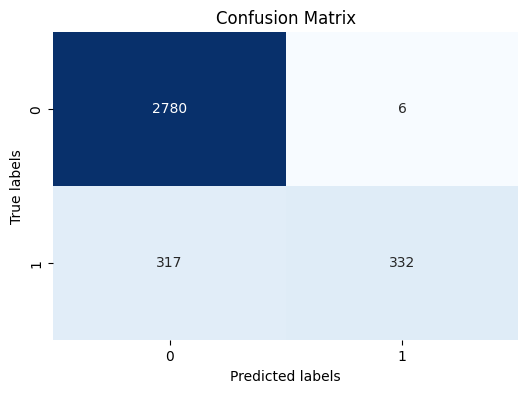

In [ ]:
conf_matrix = confusion_matrix(y_test, predictions)

# Visualizing the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()


## ROC curves

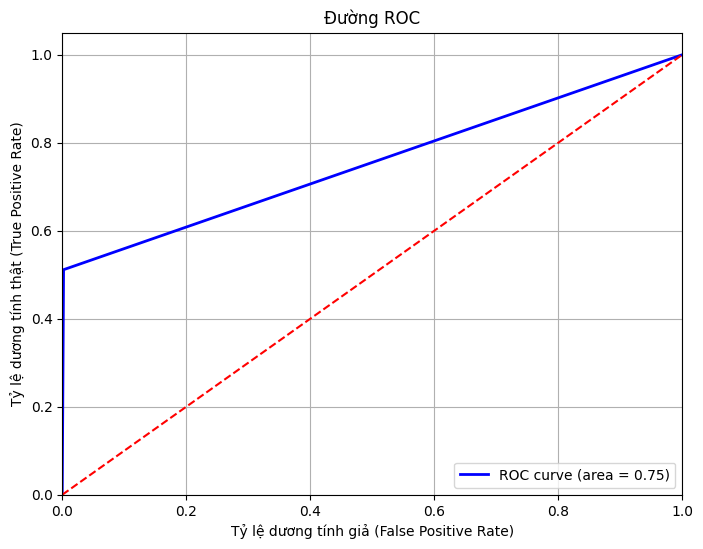

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

# Vẽ ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Đường chéo
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tỷ lệ dương tính giả (False Positive Rate)')
plt.ylabel('Tỷ lệ dương tính thật (True Positive Rate)')
plt.title('Đường ROC')
plt.legend(loc="lower right")
plt.grid()
plt.show()